Импортируем библиотеки

In [29]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import random
import math
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Загружаем набор данных

In [55]:
df = pd.read_csv('../archive/pokemon.csv')
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


Добавляем пропуски

In [70]:
columns = df.columns
for column in columns:
    rows = np.random.randint(0, len(df) - 1, random.randint(1, 10))
    for row in rows:
        df[column][row] = np.nan
df.isnull().sum()

number         12
name           10
type1           5
type2         503
total          12
hp             14
attack          7
defense        12
sp_attack      10
sp_defense     10
speed          11
generation      4
legendary      13
dtype: int64

Числовые переменные помечаем меткой float64, а категориальные меткой category

In [71]:
df[['number', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation']] = \
df[['number', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation']].astype('float64')
df[['name', 'type1', 'type2']] = df[['name', 'type1', 'type2']].astype('category')
df['legendary'] = df['legendary'].astype('bool')

In [42]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3.0,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
3,3.0,Mega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,3.0,Gigantamax Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      1063 non-null   float64 
 1   name        1072 non-null   category
 2   type1       1072 non-null   category
 3   type2       574 non-null    category
 4   total       1063 non-null   float64 
 5   hp          1063 non-null   float64 
 6   attack      1063 non-null   float64 
 7   defense     1063 non-null   float64 
 8   sp_attack   1063 non-null   float64 
 9   sp_defense  1063 non-null   float64 
 10  speed       1063 non-null   float64 
 11  generation  1072 non-null   int64   
 12  legendary   1072 non-null   bool    
dtypes: bool(1), category(3), float64(8), int64(1)
memory usage: 122.8 KB


In [58]:
df.describe(include='all')

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,1071.000000,1072,1072,574,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1072
unique,NaN,1072,20,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Abomasnow,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,136,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954
mean,445.099907,NaN,NaN,NaN,440.755369,70.487395,80.962652,74.958917,73.285714,72.444444,68.724556,4.297852,NaN
std,267.869396,NaN,NaN,NaN,121.361220,26.880587,32.469058,31.221132,32.655846,27.927350,30.006911,2.345404,NaN
min,1.000000,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,NaN
25%,209.500000,NaN,NaN,NaN,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,NaN
50%,442.000000,NaN,NaN,NaN,460.000000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,NaN
75%,681.500000,NaN,NaN,NaN,518.500000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,NaN


Выполним поиск признаков, содержащих NaN.

In [72]:
for column in df.columns:
    if (df[column].isnull().sum() > 0):
        print('Column\t', column)
        print('NaNs\t', df[column].isnull().sum())
        print(df[column].describe(include='all'))
        print('-----------------------------')

Column	 number
NaNs	 12
count    1060.000000
mean      445.888679
std       266.940408
min         1.000000
25%       211.750000
50%       443.500000
75%       681.250000
max       898.000000
Name: number, dtype: float64
-----------------------------
Column	 name
NaNs	 10
count          1062
unique         1062
top       Abomasnow
freq              1
Name: name, dtype: object
-----------------------------
Column	 type1
NaNs	 5
count      1067
unique       20
top       Water
freq        135
Name: type1, dtype: object
-----------------------------
Column	 type2
NaNs	 503
count        569
unique        18
top       Flying
freq         113
Name: type2, dtype: object
-----------------------------
Column	 total
NaNs	 12
count    1060.000000
mean      440.238679
std       121.637624
min       175.000000
25%       330.000000
50%       460.000000
75%       518.000000
max      1125.000000
Name: total, dtype: float64
-----------------------------
Column	 hp
NaNs	 14
count    1058.000000
mean     

In [61]:
df_wo_type2[df_wo_type2.isna().any(axis=1)]

,number,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
68,50.0,Alolan Diglett,Ground,265.0,NaN,55.0,30.0,35.0,45.0,90.0,7,False
266,NaN,Mega Steelix,Steel,610.0,75.0,125.0,230.0,55.0,95.0,30.0,2,False
275,215.0,Sneasel,Dark,430.0,55.0,95.0,NaN,35.0,75.0,115.0,2,False
504,413.0,Wormadam Sandy Cloak,Bug,424.0,60.0,79.0,105.0,59.0,NaN,36.0,4,False
525,432.0,Purugly,Normal,452.0,71.0,82.0,64.0,64.0,59.0,NaN,4,False
616,512.0,Simisage,Grass,NaN,75.0,98.0,63.0,98.0,63.0,101.0,5,False
779,659.0,Bunnelby,Normal,237.0,38.0,NaN,38.0,32.0,36.0,57.0,6,False
945,803.0,Poipole,Poison,420.0,67.0,73.0,67.0,NaN,67.0,73.0,7,False


Применим методы восстановления значения признак

Применим метод замены пропусков для числовых значений: среднее, медиана, на основе корреляции, на основе расстояния

Среднее:

In [73]:
float_df = df.select_dtypes(include=['float64'])

for column in float_df.columns:
    if (float_df[column].isnull().sum() > 0):
        float_df[column] = float_df[column].fillna(float_df[column].mean())
        print('Среднее значение для', column, ":", float_df[column].mean())
        print('------------------------------------------------------')

Среднее значение для number : 445.888679245283
------------------------------------------------------
Среднее значение для total : 440.238679245283
------------------------------------------------------
Среднее значение для hp : 70.40264650283554
------------------------------------------------------
Среднее значение для attack : 81.01408450704226
------------------------------------------------------
Среднее значение для defense : 74.83396226415094
------------------------------------------------------
Среднее значение для sp_attack : 73.25141242937853
------------------------------------------------------
Среднее значение для sp_defense : 72.40018832391715
------------------------------------------------------
Среднее значение для speed : 68.66918001885014
------------------------------------------------------
Среднее значение для generation : 4.3043071161048685
------------------------------------------------------


Медиана

In [74]:
float_df = df.select_dtypes(include=['float64'])

for column in float_df.columns:
    if (float_df[column].isnull().sum() > 0):
        float_df[column] = float_df[column].fillna(float_df[column].median())
        print('Медианное значение для', column, ":", float_df[column].median())
        print('------------------------------------------------------')

Медианное значение для number : 443.5
------------------------------------------------------
Медианное значение для total : 460.0
------------------------------------------------------
Медианное значение для hp : 68.0
------------------------------------------------------
Медианное значение для attack : 80.0
------------------------------------------------------
Медианное значение для defense : 70.0
------------------------------------------------------
Медианное значение для sp_attack : 65.0
------------------------------------------------------
Медианное значение для sp_defense : 70.0
------------------------------------------------------
Медианное значение для speed : 65.0
------------------------------------------------------
Медианное значение для generation : 4.0
------------------------------------------------------


На основе корреляции (замена пустых значений колонки total на основе колонок hp, attack и defense)

In [75]:
float_df = df.select_dtypes(include=['float64'])

index_total = float_df.index[float_df.total.apply(pd.isna)][0]
mean_total, mean_hp, mean_attack, mean_defense = float_df.dropna().total.mean(), float_df.dropna().hp.mean(), float_df.dropna().attack.mean(), float_df.dropna().defense.mean()
hp_corr, attack_corr, defense_corr = float_df.corr()['total'].iloc[2], float_df.corr()['total'].iloc[3], float_df.corr()['total'].iloc[4]

print()
print(f'mean total: {mean_total}, mean hp: {mean_hp}, mean defense: {mean_defense}')
print(f'hp_corr: {round(hp_corr, 2)}, attack corr: {round(attack_corr, 2)}, defense corr: {round(defense_corr, 2)}')

numerator = hp_corr * (float_df.hp.iloc[index_total] - mean_hp) + attack_corr * (float_df.attack.iloc[index_total] - mean_attack) + defense_corr * (float_df.defense.iloc[index_total] - mean_defense)
denominator = abs(hp_corr) + abs(attack_corr) + abs(defense_corr)

empty_total = mean_total + (numerator / denominator)

float_df.total.at[index_total] = empty_total
print()
print("Полученное значение на основе корреляции:", empty_total)


mean total: 439.1918367346939, mean hp: 70.3, mean defense: 74.52142857142857
hp_corr: 0.66, attack corr: 0.74, defense corr: 0.63

Полученное значение на основе корреляции: 458.0200967870427


На основе расстояний

In [76]:
def calc_metric(sample1: np.array, sample2: np.array, formula: str) -> float:

    fn = {
        'euclid': lambda : np.sqrt(np.sum(np.square(sample1 - sample2))),
        'manhattan': lambda : np.sum(np.abs(sample1 - sample2)),
        'max': lambda : np.max(np.abs(sample1 - sample2))
    }

        
    return fn[formula]()

float_df = df.select_dtypes(include=['float64'])

metrics_result = []

df_test = float_df.drop(columns = ['number', 'total', 'sp_attack', 'sp_defense', 'speed', 'generation'])
df_test.dropna()

x = df_test.loc[float_df.total.isnull()].to_numpy()

for columns, values in df_test[~float_df.total.isnull()].iterrows():
    x2 = values.to_numpy()
    metric_value = calc_metric(x, x2, 'euclid')
    metrics_result.append(metric_value)
    print('metric:', metric_value)

values = float_df[~float_df.total.isnull()].total.to_numpy()
metrics_result = np.array(metrics_result)

normal = 1 / np.sum(1 / metrics_result)

score = np.sum(np.divide(values, metrics_result)) * normal

print('Результат на основе расстояний:', score)

metric: 264.37851652507624
metric: 205.01707245983198
metric: 161.83942659315127
metric: 207.52831132161222
metric: 161.83942659315127
metric: 277.69407627819504
metric: 210.71307505705477
metric: 161.74053295324583
metric: 227.37634001804145
metric: 167.45148551147582
metric: 161.74053295324583
metric: 245.93495074917675
metric: 189.27229062913568
metric: 167.76173580408616
metric: 202.83983829612959
metric: 167.76173580408616
metric: 328.16154558387854
metric: 317.4271569982632
metric: 257.1186496542015
metric: 257.1186496542015
metric: 332.76117561999325
metric: 315.59467676119
metric: 224.43261795024358
metric: 305.6959273526555
metric: 294.125823415762
metric: 218.67327225795108
metric: 169.1685549976709
metric: 166.18664206247144
metric: 301.2640038238887
metric: 301.2640038238887
metric: 192.50974001333023
metric: 178.99720668211557
metric: 291.8561289402708
metric: 174.26990560621763
metric: 270.04073766748604
metric: 173.26857764753538
metric: 284.67525357852935
metric: 284.67

Применим метод замены пропусков для номинальных признаков (на основе моды)

In [77]:
category_df = df.select_dtypes(include=['category'])

for column in category_df.columns:
    if (category_df[column].isnull().sum() > 0):
        category_df[column] = category_df[column].fillna(category_df[column].mode())
        print(column)
        print(category_df[column].mode())
        print('-----------------------------------------------')

name
0                          Appletun
1                          Chinchou
2                          Garchomp
3            Gourgeist Average Size
4             Keldeo Ordinary Forme
5                            Machop
6                   Mega Aerodactyl
7                         Tyrantrum
8                         Xurkitree
9    Zamazenta Crowned Sheild Forme
Name: name, dtype: category
Categories (1072, object): ['Abomasnow', 'Abra', 'Absol', 'Accelgor', ..., 'Zweilous', 'Zygarde 10% Forme', 'Zygarde 50% Forme', 'Zygarde Complete Forme']
-----------------------------------------------
type1
0    Water
Name: type1, dtype: category
Categories (20, object): ['Blastoise', 'Bug', 'Dark', 'Dragon', ..., 'Psychic', 'Rock', 'Steel', 'Water']
-----------------------------------------------
type2
0    Flying
Name: type2, dtype: category
Categories (18, object): ['Bug', 'Dark', 'Dragon', 'Electric', ..., 'Psychic', 'Rock', 'Steel', 'Water']
-----------------------------------------------


Замену пропусков на основе моды в этом наборе данных лучше не использовать, так как у всех покемонов своё уникальное имя и свои типы, придуманные авторами. Типы можно примерно заполнить на основе характеристик покемонов, например у редкого type2 Dragon значение attack в среднем больше, чем у Flying, но для точных замен придется делать множество вычислений для разных типов.

Применим поиск выбросов в числовых признаках

На основе простейшего метода из алгоритма 2 (с учетом нормальности)

In [78]:
float_df = df.select_dtypes(include=['float64'])

total_df = float_df['total']

normalized_data = (total_df - total_df.mean()) / total_df.std()

lower_bound = normalized_data.mean() - (3 * normalized_data.std())
upper_bound = normalized_data.mean() + (3 * normalized_data.std())

anomalies = total_df.loc[(normalized_data < lower_bound) | (normalized_data > upper_bound)]

print(anomalies)

1057    1125.0
Name: total, dtype: float64


На основе методов без использования среднего и СКО

In [80]:
float_df = df.select_dtypes(include=['float64'])

total_df = float_df['total']

q1 = total_df.quantile(0.25)
q3 = total_df.quantile(0.75)

lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q1 + 1.5 * (q3 - q1)

anomalies = total_df.loc[(total_df < lower_bound) | (total_df > upper_bound)]
print(anomalies)

3        625.0
8        634.0
9        634.0
14       630.0
176      640.0
         ...  
1055     720.0
1056     690.0
1057    1125.0
1070     680.0
1071     680.0
Name: total, Length: 62, dtype: float64


Метод без использования среднего и СКО оказался более точным, чем на основе простейшего метода

На основе критерия Шовене

In [81]:
from scipy.special import erfc
import scipy.stats as st

def chauvenet(y: np.array, mean=None, stdv=None) -> np.array:
    # based on https://github.com/msproteomicstools/msproteomicstools/blob/master/msproteomicstoolslib/math/chauvenet.py
    '''
        Returns: np.array[bool]. if false, then outlier
    '''
    if mean is None:
        mean = y.mean()    # Mean of incoming array y
    if stdv is None:
        stdv = y.std()      # Its standard deviation

    abs_deviation = np.abs(y - mean) / stdv
    d = erfc(abs_deviation)
    # Calculate the maximum absolute deviation that is still acceptable according to Chauvenet's criterion
    threshold = 1 / (2 * y.size - 1)

    # Determine which data points are outliers
    is_outlier = d > threshold

    # Return the indices of the outliers
    return is_outlier

float_df = df.select_dtypes(include=['float64'])

total_df = float_df['total']


mean = total_df.mean()
stdv = total_df.std()

def iterate(sample: np.array, repeat: bool = True) -> np.array:
    test_result = chauvenet(sample, mean, stdv)
    repeat = np.any(test_result == False)
    
    print('sample: ', sample)
    print('test_result: ', test_result)
    print('-----')
    
    if repeat:
        return iterate(sample[test_result], repeat)
    
    return sample
    
print(iterate(sample=total_df))

sample:  0       318.0
1       405.0
2       525.0
3       625.0
4       525.0
        ...  
1067    580.0
1068    580.0
1069    500.0
1070    680.0
1071    680.0
Name: total, Length: 1072, dtype: float64
test_result:  0       True
1       True
2       True
3       True
4       True
        ... 
1067    True
1068    True
1069    True
1070    True
1071    True
Name: total, Length: 1072, dtype: bool
-----
sample:  0       318.0
1       405.0
2       525.0
3       625.0
4       525.0
        ...  
1067    580.0
1068    580.0
1069    500.0
1070    680.0
1071    680.0
Name: total, Length: 1053, dtype: float64
test_result:  0       True
1       True
2       True
3       True
4       True
        ... 
1067    True
1068    True
1069    True
1070    True
1071    True
Name: total, Length: 1053, dtype: bool
-----
0       318.0
1       405.0
2       525.0
3       625.0
4       525.0
        ...  
1067    580.0
1068    580.0
1069    500.0
1070    680.0
1071    680.0
Name: total, Length: 1053, dtype

Провести поиск аномалий числовых переменных

In [82]:
from scipy.spatial.distance import pdist, squareform

float_df = df.select_dtypes(include=['float64'])

columns = ['total', 'hp', 'attack']
new_df = float_df[columns].dropna()
new_df = (new_df - new_df.mean()) / new_df.std()

dist = pdist(new_df, 'euclidean')
dist_matrix = squareform(dist)
bound = np.percentile(dist, 99)

anomalies = []
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        if dist_matrix[i][j] > bound:
            anomalies.append((i, j, dist_matrix[i][j]))

            
print(len(anomalies))

5393


Тесты на статистическую значимость

Выбрать в качестве X и Y числовые переменные

In [87]:
from scipy.stats import shapiro, ttest_ind

df = pd.read_csv('../archive/pokemon.csv')

X = df.defense[df['legendary'] == False]
Y = df.defense[df['legendary'] == True]

X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

_, p_value_x = shapiro(X)
_, p_value_y = shapiro(Y)

print('p-value x:', p_value_x)
print('p-value y:', p_value_y)

_, p_value = ttest_ind(X, Y)

print('p-value:', p_value)

p-value x: 2.374128557709951e-20
p-value y: 1.680655714153545e-06
p-value: 0.9999999999999971


Обычно установлен порог P-value в 0.05 или 0.01, что означает, что если P-value меньше этого порога, мы можем считать результаты статистически значимыми и отвергнуть нулевую гипотезу

Выбрать в качестве X и Y числовую и номинальную переменную соответственно

F_onewayResult(statistic=9.453369953993048, pvalue=1.0255189550755751e-25)

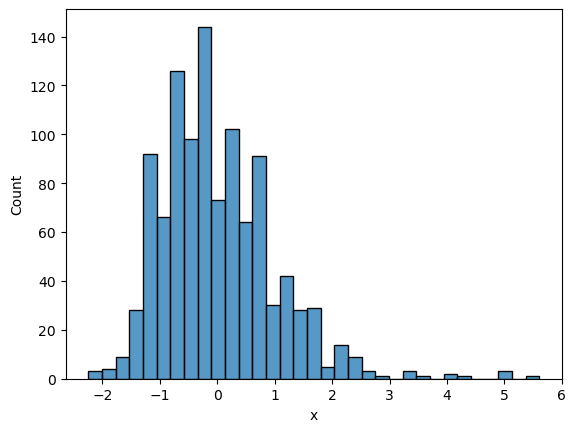

In [89]:
import scipy.stats as stats
import seaborn as sns

df['x'] = (df['defense'] - df['defense'].mean()) / df['defense'].std()
sns.histplot(df['x'])
stats.normaltest(df['x'])

groups = []
for group in df['type1'].unique():
    groups.append(df.loc[df['type1'] == group, 'x'])
    
stats.f_oneway(*groups)

Исходя из полученных данных, можно заключить, что между выборками есть статистические значимые различия.

Выберем в качестве X и Y номинальные переменные

In [90]:
from scipy.stats import chi2_contingency

# частота каждой категории
crosstab  = pd.crosstab(df['type1'], df['type2'])

# критерий хи-квадрат
chi2, p_value, dof, expected_freq = chi2_contingency(crosstab)

print("Chi-square statistic: ", chi2)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies:\n", expected_freq)

Chi-square statistic:  728.0653279219121
p-value:  2.0489783669885528e-36
Degrees of freedom:  306
Expected frequencies:
 [[ 0.0174216   0.04878049  0.06097561  0.01916376  0.07665505  0.05574913
   0.03135889  0.19860627  0.04529617  0.05052265  0.06794425  0.03310105
   0.01916376  0.07142857  0.07491289  0.02787456  0.06271777  0.03832753]
 [ 1.11498258  3.12195122  3.90243902  1.22648084  4.90592334  3.56794425
   2.00696864 12.71080139  2.8989547   3.23344948  4.34843206  2.1184669
   1.22648084  4.57142857  4.79442509  1.78397213  4.01393728  2.45296167]
 [ 0.59233449  1.65853659  2.07317073  0.65156794  2.60627178  1.89547038
   1.06620209  6.75261324  1.54006969  1.71777003  2.31010453  1.12543554
   0.65156794  2.42857143  2.54703833  0.94773519  2.13240418  1.30313589]
 [ 0.48780488  1.36585366  1.70731707  0.53658537  2.14634146  1.56097561
   0.87804878  5.56097561  1.26829268  1.41463415  1.90243902  0.92682927
   0.53658537  2.          2.09756098  0.7804878   1.75609756 

Исходя из полученных данных, можно заключить, что между выборками есть статистические значимые различия.